# Distinguishing Sentiments

# Analysis

#  Observed Trend 1
There were more overall positive sentiment tweets about 3 media news organizations,
we analyzed on 06/28/2018, BBC, CBS, and Fox. Only CNN and New York Times had about
the same amount of overall negative and overall positive sentiment tweets, 
so their overall sentiment tweet ratings were negative, but very close to being nuetral.
 
# Observed Trend 2
We observed the following tweet favorability trend among 5 media organizations, from the highest to the lowest:
CBS, the highest, then Fox, having roughly the half of CBS positive sentiments, then BBC, then New York Times 
and the lowest was CNN today, 06/28/2018. 

# Observed Trend 3
Overwhelmingly, the number of positive tweets were larger than the number of negative tweets for 3 news media 
organizations, BBC, CBS, and Fox. For New York Times there were the same amount of neutral, negative
and positive tweets. For CNN there were the same amount of negative and positive tweets, practically no neutral ones.

In [1]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import csv
from datetime import datetime
import matplotlib.pyplot as plt
from config import (consumer_key, consumer_secret, 
                    access_token, access_token_secret)

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target User Account
target_media_user = ("@BBC", "@CBS","@CNN", "@FOXTV","@nytimes")

# List for dictionary of results for all tweets for media users
results_list = []

# List for for dictionary of results for _overall_ sentiments for each media user
media_user_overal_results = []

In [3]:
# Loop through each meadia outlet
for media_user in target_media_user:

# Variables for holding compound sentiments
    compound_list = []
    
    # Variable for max_id
    oldest_tweet = None
    
    # Counter
    counter = 1
    
    # Loop through 5 pages of tweets (total 100 latest tweets) for this media outet (media_user)
    for x in range (5):
           
        ###print(f"For page number:'{x}'")    
        # Get all feeds from home feed
        ##public_media_tweets = api.user_timeline(media_user, page=x)
        public_media_tweets = api.user_timeline(media_user, max_id = oldest_tweet)
    
        # Loop through each page, 20 tweets
        for media_tweet in public_media_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(media_tweet["text"]) 
            compound = results["compound"]
            pos = results["pos"]
            neg = results["neg"]
            neu = results["neu"]
            

            # Get media_tweet date
            tweet_raw_time = media_tweet["created_at"]
            ###print(f"For '{media_user}': tweet raw time: '{tweet_raw_time}'")
            #  Convert tweet_raw_time(timestamps) to datetime objects that can be manipulated
            tweet_datetime = datetime.strptime(tweet_raw_time, "%a %b %d %H:%M:%S %z %Y")
            ###print(f"For '{media_user}': tweet datetime: '{tweet_datetime}'")
            # Get media tweet text
            media_text = media_tweet["text"]
            
            # Store each of this media_user tweet info
            media_user_tweet_info = {
                          "Source Account": media_user,
                          "Text": media_text,
                          "Date": tweet_datetime,
                          "Compound": compound,
                          "Positive": pos,
                          "Negative": neg,
                          "Neutral": neu
            } 
            
            # Print media user tweet info
            ###print(media_user_tweet_info)
            ###print()
            
            # Store all data for this media outlet, media_user, in 'results_list', append each tweet info
            results_list.append(media_user_tweet_info)
                                     
            # Add each compound sentiment to the compound_list for each media user
            compound_list.append(compound)
            
            # Add to counter
            ###print(f"Media_user '{media_user}': Counter = '{counter}'.")
            counter += 1
                   
        # Get Tweet ID, substract 1, assign to oldest_tweet
        oldest_tweet = media_tweet["id"] - 1
                           
    # List for for dictionary of results for _overall_ sentiments for each media user
    media_user_overal_results.append({"Media User": media_user, "Overall Sentiment": np.mean(compound_list)})
    
    # Print MEDIA USER OVERALL RESULTS
    ###print(f"MEDIA USER OVERALL RESULTS: '{media_user_overal_results}'")
    ###print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
        
    # Print the RESULT LIST so far
    #######print(f"RESULTS LIST: '{results_list}'")
    #######print("_____________________________________________")
    
    ###print(f"WE ARE DONE WITH ALL PAGES for this media outlet '{media_user}'") 
        
###print(f"WE ARE DONE WITH ALL MEDIA OUTLETS TWEETS. That's all, Folks !") 

In [4]:
# Print the RESULT LIST so far
###print(f"RESULTS LIST: '{results_list}'")
print("_____________________________________________")

# Prepare DataFrame for the bar plot
media_user_overall_df = pd.DataFrame.from_dict(media_user_overal_results)
media_user_overall_df.head() 

_____________________________________________


,Media User,Overall Sentiment
0,@BBC,0.133081
1,@CBS,0.355032
2,@CNN,-0.018212
3,@FOXTV,0.192017
4,@nytimes,-0.005596


# Output all media users tweet results into CSV file

In [5]:
# Prepare Results Dataframe to output to CSV file and for the scatter plot
######media_user_results_df = pd.DataFrame.from_dict(results_list)
media_user_results_df = pd.DataFrame.from_dict(results_list)
media_user_results_df.head(10)

,Compound,Date,Negative,Neutral,Positive,Source Account,Text
0,-0.2960,2018-06-28 19:05:04+00:00,0.099,0.901,0.000,@BBC,Tesla chief executive Elon Musk has been accus...
1,0.0000,2018-06-28 18:02:05+00:00,0.000,1.000,0.000,@BBC,Can changing your body change your life? https...
2,0.4696,2018-06-28 16:13:35+00:00,0.000,0.861,0.139,@BBC,RT @bbcthree: Housemates who never take the bi...
3,-0.1280,2018-06-28 16:00:25+00:00,0.133,0.753,0.115,@BBC,Half of all people who drown never intended to...
4,0.0000,2018-06-28 15:52:28+00:00,0.000,1.000,0.000,@BBC,RT @BBC6Music: If you could pick just one Eryk...
5,0.4963,2018-06-28 15:22:37+00:00,0.052,0.761,0.188,@BBC,RT @BBCR1: TONIGHT Elton John (@eltonofficial)...
6,0.6369,2018-06-28 13:00:23+00:00,0.090,0.676,0.234,@BBC,Narcissists might be irritating attention seek...
7,0.4389,2018-06-28 12:02:08+00:00,0.000,0.838,0.162,@BBC,😲 Raghda Ezzeldin can hold her breath under wa...
8,-0.3818,2018-06-28 11:47:05+00:00,0.115,0.885,0.000,@BBC,RT @BBCNews: Prince William is expected to vis...
9,0.0000,2018-06-28 11:16:03+00:00,0.000,1.000,0.000,@BBC,🦔 A hedgehog which it is thought could be the ...


In [6]:
# Save all Valid Weather Data in CSV file
media_user_results_df.to_csv("MediaTweetsData.csv", encoding="utf-8", index=False)

# Scatter Plot of Sentiments of the last 
# 100 tweets by media news organizations
                    

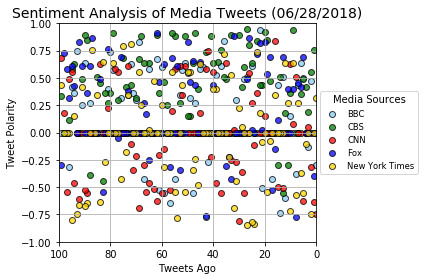

In [7]:
# Creating Sentiment Analysis of Media Tweets (06/28/2018) Scatter Plot

# Clear space for the scatter plot
# plt.close(1)

# Separate media_user_results_df Dataset into 5 parts/ datasets by "Media Source"
bbc_tweet_data_df = media_user_results_df[media_user_results_df["Source Account"] == "@BBC"] 
cbs_tweet_data_df = media_user_results_df[media_user_results_df["Source Account"] == "@CBS"] 
# For each of media sources following the first one in the media dataset reset index to 0-99
# in order to plot in the common area
###print("_____________START HERE__________________________")
cbs_tweet_data_df = cbs_tweet_data_df.reset_index(drop=True)
###print(cbs_tweet_data_df)
###print("_____________STOP HERE__________________________")

cnn_tweet_data_df = media_user_results_df[media_user_results_df["Source Account"] == "@CNN"] 
cnn_tweet_data_df = cnn_tweet_data_df.reset_index(drop=True)
fox_tweet_data_df = media_user_results_df[media_user_results_df["Source Account"] == "@FOXTV"] 
fox_tweet_data_df = fox_tweet_data_df.reset_index(drop=True)
nytimes_tweet_data_df = media_user_results_df[media_user_results_df["Source Account"] == "@nytimes"] 
nytimes_tweet_data_df = nytimes_tweet_data_df.reset_index(drop=True)

# Get the values for each part of the scatter plot by "Media Source"
# BBC
# Get values for X axis
bbc_tweet_ago_data = bbc_tweet_data_df.index
###print(bbc_tweet_ago_data)
# Get values for Y axis
bbc_tweet_polarity_data = bbc_tweet_data_df['Compound'] 
###print(bbc_tweet_polarity_data)
####################################################################
# CBS
# Get values for X axis
cbs_tweet_ago_data = cbs_tweet_data_df.index 
###print(cbs_tweet_ago_data)
# Get values for Y axis
cbs_tweet_polarity_data = cbs_tweet_data_df['Compound'] 
###print(cbs_tweet_polarity_data)
####################################################################
# CNN
# Get values for X axis
cnn_tweet_ago_data = cnn_tweet_data_df.index
###print(cnn_tweet_ago_data)
# Get values for Y axis
cnn_tweet_polarity_data = cnn_tweet_data_df['Compound'] 
###print(cnn_tweet_polarity_data)
####################################################################
# FOX
# Get values for X axis
fox_tweet_ago_data = fox_tweet_data_df.index
###print(fox_tweet_ago_data)
# Get values for Y axis
fox_tweet_polarity_data = fox_tweet_data_df['Compound'] 
###print(fox_tweet_polarity_data)
####################################################################
# New York Times
# Get values for X axis
nytimes_tweet_ago_data = nytimes_tweet_data_df.index
###print(nytimes_tweet_ago_data)
# Get values for Y axis
nytimes_tweet_polarity_data = nytimes_tweet_data_df['Compound'] 
###print(nytimes_tweet_polarity_data)
####################################################################

# Organize the layout for the scatter plot
plt.title("Sentiment Analysis of Media Tweets (06/28/2018)", Fontsize= 14 )
# Labels for the scatter plot circles for each media_user
labels = ["BBC", "CBS","CNN", "Fox","New York Times"]
# Colors for the scatter plot circles for each media_user
colors = ["lightskyblue","green","red", "blue", "gold"]

# Define X and Y of the scatter plot
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

# Define X and Y limits
plt.xlim(100, 0)
plt.ylim( -1.0, 1.0 )

# Writing data to the same Scatter Plot 5 times, for each media user ( "BBC", "CBS","CNN", "Fox","New York Times")
plt.scatter( bbc_tweet_ago_data, bbc_tweet_polarity_data, c="lightskyblue", edgecolor="black", 
            linewidths=1, alpha =0.75, marker='o', label="BBC")
plt.scatter( cbs_tweet_ago_data, cbs_tweet_polarity_data, c="green", edgecolor="black", \
            linewidths=1, alpha=0.75, marker='o', label="CBS")
plt.scatter( cnn_tweet_ago_data, cnn_tweet_polarity_data, c="red", edgecolor="black", 
            linewidths=1, alpha=0.75, marker='o', label="CNN")
plt.scatter( fox_tweet_ago_data, fox_tweet_polarity_data, c="blue", edgecolor="black", 
            linewidths=1, alpha=0.75, marker='o', label="Fox")
plt.scatter( nytimes_tweet_ago_data, nytimes_tweet_polarity_data, c="gold", edgecolor="black", 
            linewidths=1, alpha=0.75, marker='o', label="New York Times")
 
# Create the legend of the Scatter plot
legend = plt.legend(fontsize="small", loc="center left", title="Media Sources", bbox_to_anchor=(1, 0.5))
plt.tight_layout()

plt.grid(True)

# Save the figure with the Scatter Plot
plt.savefig("MediaSentimentsTweeterPolarityScatterPlot.png")

# Show the Scatter Plot
plt.show()

 # Bar Plot of Overall Sentiments of the last 
 # 100 tweets by media news organizations
                         

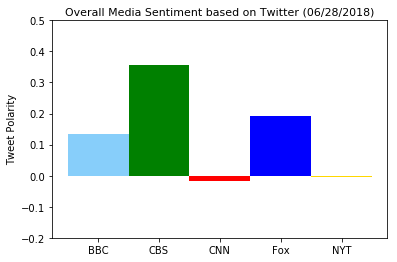

In [8]:
# Creating Sentiment Analysis of Media Tweets (06/28/2018) Bar Plot

# Clear space for the scatter plot
# plt.close(1)
    
# Print MEDIA USER OVERALL RESULTS
###print(f"MEDIA USER OVERALL RESULTS: '{media_user_overal_results}'")

media_tweet_results_df = pd.DataFrame(media_user_overal_results)
media_tweet_results_df.head(10)

# Update the result Data Frame forcreateing the Bar Plot
media_tweet_results_df["Media User"] = media_tweet_results_df["Media User"].replace({"@BBC": "BBC",
                                                            "@CBS": "CBS",
                                                            "@CNN": "CNN",
                                                            "@FOXTV": "Fox",
                                                            "@nytimes": "NYT"})
media_tweet_results_df.head(10)

# Set index on "Media User" column for outr bar plotting
media_df = media_tweet_results_df.set_index("Media User")
media_df.head()

# Organize the layout for the bar plot
plt.title("Overall Media Sentiment based on Twitter (06/28/2018)", Fontsize= 11 )
# Colors for the scatter plot circles for each media_user
colors = ["lightskyblue","green","red", "blue", "gold"]

# Define X and Y of the bar plot
###plt.xlabel("BBC   CBS   CNN   Fox   NYT")
plt.ylabel("Tweet Polarity")
 
###print(f"{range(len(media_df.index))}" )
media_df.index

# Define Y limits
plt.ylim(-0.20, 0.50)

width = 1      # the width of the bars: can also be len(x) sequence

# Add counts above the two bar graphs
# for rect in bar1 + bar2:
#     height = rect.get_height()
#     plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.bar(media_df.index, media_df["Overall Sentiment"], width, color=colors)

##plt.xticks(range(len(media_df)), media_df.index, rotation=45)

# Save the figure with the Bar Plot
plt.savefig("MediaSentimentsTweeterPolarityBarPlot.png")

# Show the Scatter Plot
plt.show()